# Proprocessing Data #

## Importing Libraries ##

In [1]:
# import zipfile
# import glob
import os
import numpy as np
import torch 
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import warnings

## Unzipping Compressed File ##

In [2]:
# files = glob.glob('./*.zip')
# files

In [3]:
# for file in files:
#     print('Unzipping', file)
    
#     with zipfile.ZipFile(file, 'r') as zip_ref:
#         zip_ref.extractall('resize')

## Grabbing all file paths ##

In [4]:
path = './resize/resize_1024'

In [5]:
img_paths = np.array(os.listdir(path))
rand_paths = np.array(os.listdir(path))
np.random.shuffle(rand_paths)

In [6]:
pairs = []
for i in range(len(img_paths)):
    pairs.append((img_paths[i], rand_paths[i]))

print(len(pairs))

4320


In [7]:
# for i in range(50):
#     print(dg[i][1])

## Creating DataFrame ##

In [8]:
cols = ['mixed', 'pic1', 'pic2']
df = pd.DataFrame(columns=cols)
df.head()

,mixed,pic1,pic2


In [9]:
warnings.filterwarnings('ignore')

In [18]:
for x in range(0, len(pairs)):
    img, random = pairs[x]
    try:
        img = cv2.imread(os.path.join(path, image))
        img2 = cv2.imread(os.path.join(path, random))
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

        for i in range(len(gray)):
            for j in range(len(gray[0])):
                p = gray[i][j]
                p2 = gray2[i][j]



                #high
                hp = p & 240
                hp2 = p2 & 240

                # dg[i][j] = hp
                # dg2[i][j] = hp2

                lp = hp >> 4
                lp2 = hp2 >> 4


                gray[i][j] = hp | lp2 # 1110000 | 11110000 -> 11110000 | 00001111
                gray2[i][j] = hp2 | lp

        m_path = './mixed/m_{}.jpeg'.format(x)
        m2_path = './mixed/m2_{}.jpeg'.format(x)
        cv2.imwrite(m_path, gray)
        cv2.imwrite(m2_path, gray2)
        df = df.append({"mixed": 'm_{}.jpeg'.format(x), "pic1" : image, "pic2" : random}, ignore_index = True)
        df = df.append({"mixed": 'm2_{}.jpeg'.format(x),"pic1" : random, "pic2" : image}, ignore_index = True)
    
    except:
        print("Error")

Error


In [19]:
df.head()

,mixed,pic1,pic2
0,m_1.jpeg,img_1977.jpeg,img_488.jpeg
1,m2_1.jpeg,img_488.jpeg,img_1977.jpeg
2,m_0.jpeg,img_1977.jpeg,img_488.jpeg
3,m2_0.jpeg,img_488.jpeg,img_1977.jpeg
4,m_1.jpeg,img_1977.jpeg,img_1358.jpeg


In [20]:
# df2 = pd.read_csv('./image_paths.csv')

In [21]:
# df2.head()

In [22]:
# df2 = df2.drop(columns = ['Unnamed: 0'])
# df2.head()

In [23]:
# df = pd.concat([df, df2])
# df.head()

In [24]:
# len(df)

In [25]:
df.to_csv('image_paths.csv')

In [26]:
df.head()

,mixed,pic1,pic2
0,m_1.jpeg,img_1977.jpeg,img_488.jpeg
1,m2_1.jpeg,img_488.jpeg,img_1977.jpeg
2,m_0.jpeg,img_1977.jpeg,img_488.jpeg
3,m2_0.jpeg,img_488.jpeg,img_1977.jpeg
4,m_1.jpeg,img_1977.jpeg,img_1358.jpeg


## Scratch Space ##

In [40]:
s = '11001011'
s2 = '11011101'
print(int(s,2), int(s2, 2))

203 221


In [ ]:
# print(gray), print(gray2), print(dg), print(dg2)

In [17]:
img = cv2.imread(os.path.join(path, image))
img2 = cv2.imread(os.path.join(path, random))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

for i in range(len(gray)):
    for j in range(len(gray[0])):
        p = gray[i][j]
        p2 = gray2[i][j]
        
        
        
        #high
        hp = p & 240
        hp2 = p2 & 240
        
        # dg[i][j] = hp
        # dg2[i][j] = hp2
        
        lp = hp >> 4
        lp2 = hp2 >> 4
        
        
        gray[i][j] = hp | lp2 # 1110000 | 11110000 -> 11110000 | 00001111
        gray2[i][j] = hp2 | lp
        
        
m_path = './mixed/m_1.jpeg'.format(i+j)
m2_path = './mixed/m2_1.jpeg'.format(i+j)
cv2.imwrite(m_path, gray)
cv2.imwrite(m2_path, gray2)
df = df.append({"mixed": 'm_1.jpeg'.format(i+j), "pic1" : image, "pic2" : random}, ignore_index = True)
df = df.append({"mixed": 'm2_1.jpeg'.format(i+j),"pic1" : random, "pic2" : image}, ignore_index = True)

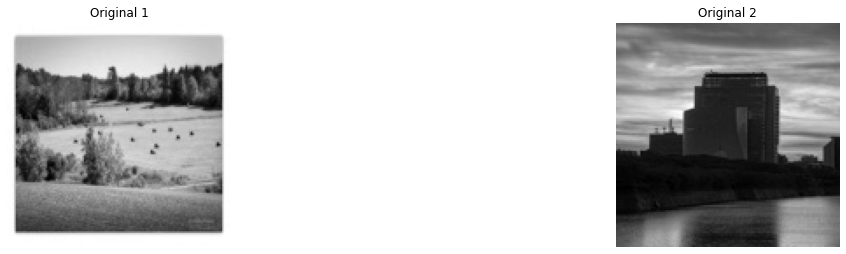

In [15]:
image, random = pairs[0]

img = cv2.imread(os.path.join(path, image))
img2 = cv2.imread(os.path.join(path, random))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# print(gray)

## Next step checking deconstructed gray images 
# dg = np.zeros(shape = (1024, 1024))
# dg2 = np.zeros(shape = (1024, 1024))


fig = plt.figure(figsize = (20, 14))
plt.subplot(3, 2, 1)
plt.imshow(gray, cmap = 'gray')
plt.title("Original 1")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(gray2, cmap = 'gray')
plt.title("Original 2")
plt.axis('off')

for i in range(len(gray)):
    for j in range(len(gray[0])):
        p = gray[i][j]
        p2 = gray2[i][j]
        
        
        
        #high
        hp = p & 240
        hp2 = p2 & 240
        
        # dg[i][j] = hp
        # dg2[i][j] = hp2
        
        lp = hp >> 4
        lp2 = hp2 >> 4
        
        
        gray[i][j] = hp | lp2 # 1110000 | 11110000 -> 11110000 | 00001111
        gray2[i][j] = hp2 | lp
        
        
        
            
        
# plt.subplot(3, 2, 3)
# plt.imshow(dg, cmap = 'gray')
# plt.title('Deconstructed 1')
# plt.axis('off')

# plt.subplot(3, 2, 4)
# plt.imshow(dg2, cmap = 'gray')
# plt.title('Deconstructed 2')
# plt.axis('off')


# plt.subplot(3, 2, 5)
# plt.imshow(gray, cmap = 'gray')
# plt.title('Pic 2 infused into Pic1')
# plt.axis('off')

# plt.subplot(3, 2, 6)
# plt.imshow(gray2, cmap = 'gray')
# plt.title('Pic1 infused into Pic2')
# plt.axis('off')
# plt.show()
